# Import Libraries

Here we import all the libraries needed for loading, processing, and visualizing the dataset

In [2]:
# Import the needed libraries
import kagglehub
import os
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px  # For interactive plots
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Needed for some non-Seaborn-based enhancements
from scipy.stats import gaussian_kde
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# About the Dataset
---

This dataset consists of data collected as part of a research project involving 30 volunteers. These volunteers wore a mobile phone and performed some specific actions. The data from the mobile phone was collected and used to analyze rotation, velocity, and other interesting calculations.

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) at the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50 Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers were selected for generating the training data and 30% for the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low-frequency components; therefore, a filter with a 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domains.

These details are specified in the 'features_info.txt' file, which describes the labels in the 'features.txt'. 

*Interesting Calculations*:

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also, the magnitude of these three-dimensional signals was calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally, a Fast Fourier Transform (FFT) was applied to some of these signals, producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

# Load the Libraries from text files

We know the data is already partitioned into a training set and a test set:

*The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers were selected for generating the training data and 30% for the test data.*

First, we will load the train data and test data, then merge them along with the Activity Names.

## For each record, the following is provided:
---

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who experimented.

## Load the Train data from text files

We know the data is already partitioned into a training set and a test set, so we just load the training data set directly.

In [6]:
# Folder where the Dataset was extracted
# I skipped putting the zip extraction into Jupyter, as it was inefficient
extract_folder = 'UCI_HAR_Dataset'

In [7]:
# Load feature names
# Ensure we use a raw separator
features = pd.read_csv(f"{extract_folder}/features.txt", 
                       sep=r'\s+', header=None, names=['index', 'feature'])
feature_names = features['feature'].tolist()

# Load training data
# Ensure we use a raw separator
X_train = pd.read_csv(f"{extract_folder}/train/X_train.txt", 
                      sep=r'\s+', header=None)
X_train.columns = feature_names  # apply the duplicate names after loading

y_train = pd.read_csv(f"{extract_folder}/train/y_train.txt", 
                      sep=r'\s+', header=None, names=['Activity'])

# Load the subjects vector
subject_train = pd.read_csv(f"{extract_folder}/train/subject_train.txt", 
                            sep=r'\s+', header=None, names=['Subject'])

# Combine training data
train_df = pd.concat([subject_train, y_train, X_train], axis=1)

# Output train data info and samples
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, Subject to angle(Z,gravityMean)
dtypes: float64(561), int64(2)
memory usage: 31.6 MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.996091

## Load the Test data from text files

We know the data is already partitioned into a training set and a test set, so we just load the test data set directly, then we concatenate both the training and test data into a single DataFrame.

In [9]:
# Load test data
# Ensure we use a raw separator
X_test = pd.read_csv(f"{extract_folder}/test/X_test.txt", 
                     sep=r'\s+', header=None)
X_test.columns = feature_names

y_test = pd.read_csv(f"{extract_folder}/test/y_test.txt", 
                     sep=r'\s+', header=None, names=['Activity'])

# Load the subjects vector
subject_test = pd.read_csv(f"{extract_folder}/test/subject_test.txt", 
                           sep=r'\s+', header=None, names=['Subject'])

# Combine test data
test_df = pd.concat([subject_test, y_test, X_test], axis=1)

# Combine train and test datasets
full_df = pd.concat([train_df, test_df], ignore_index=True)

# Output data info and samples
print(full_df.info())
print(full_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, Subject to angle(Z,gravityMean)
dtypes: float64(561), int64(2)
memory usage: 44.2 MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.9960

## Merge the Activities and their Names

We load the labels from the 'activities_labels.txt' file, and then merge those labels into the full training DataFrame.

In [11]:
# Load activity labels
activity_labels = pd.read_csv(f"{extract_folder}/activity_labels.txt", 
                              sep=r'\s+', header=None, names=['Activity', 'ActivityName'])

# Map numeric labels to names
full_df = full_df.merge(activity_labels, on='Activity')

# Output data info and samples
print(full_df.info())
print(full_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, Subject to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 44.3+ MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.

# Global Visualization Settings

In [13]:
# Set global font to Times New Roman and size to 14
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
# Set default renderer to 'png' for static images in plotly (3D graphs)
pio.renderers.default = "png"  # or "svg" for vector graphics

# Visualize Covariance

This will limit the covariance representations to accelerometer features or gyroscopic features.
Without this limitation, the number of features to consider would be too numerous

## Feature reduction

Configure the features to limit for covariance visualization

In [16]:
# Gyroscopic features
gyro_features = [
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
    'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z',
    'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z'
]

# Accelerometer features
accel_features = [
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
    'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z'
]

# Combined features
selected_features = accel_features + gyro_features

## Accelerometer Covariance
---
*Insights:*
What is the strength of the correlation between the Accelerometer features? This will help us understand if there are any patterns that arise between similar features.

*Observations:*
There is low correlation between the accelerometer features; in fact, many of them are near 0, showing independence from each other. The only exception is the tGravityAccel-mean() for Y and Z.

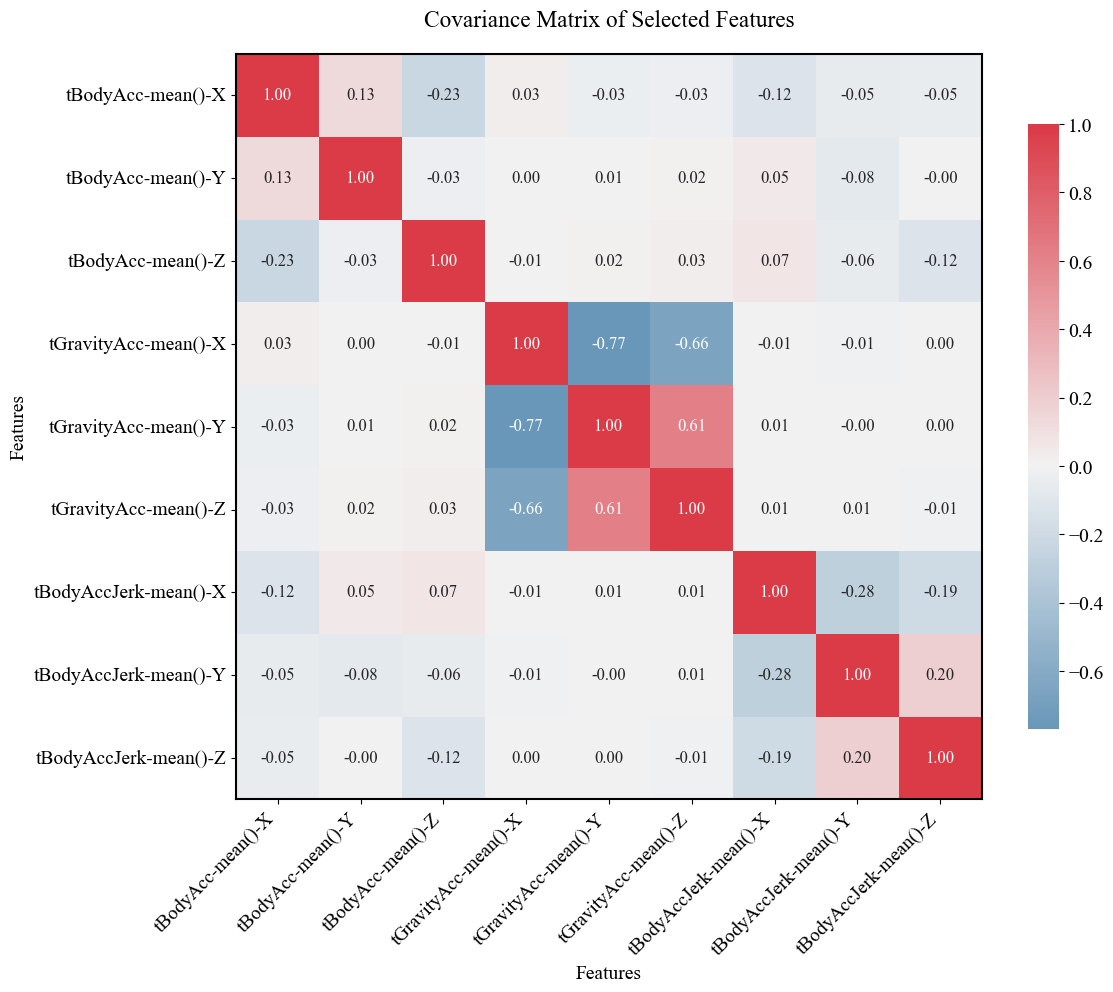

In [18]:
# Create a subset DataFrame
feature_df = full_df[accel_features].copy()

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(feature_df)

# Compute covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Create the heatmap visualization
plt.figure(figsize=(12, 10))

# Create custom diverging colormap (blue-white-red)
custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot heatmap with annotation
ax = sns.heatmap(
    cov_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    center=0,
    square=True,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 12},
    xticklabels=accel_features,
    yticklabels=accel_features
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add titles and labels
plt.title("Covariance Matrix of Selected Features", pad=20)
plt.xlabel("Features")
plt.ylabel("Features")

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add border for visual polish
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Save the graph as a PNG
plt.savefig(
    'lab5-JoshuaSummers-covariance_matrix_accelerometer.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight',   # Remove extra whitespace
    facecolor='white'
)

# Show the visualization
plt.show()

## Gyroscopic Covariance
---
*Insights:*
What is the strength of the correlation between the Accelerometer features? This will help us understand if there are any patterns that arise between similar features.

*Observations:*
There is low correlation between the accelerometer features; in fact, many of them are near 0, showing independence from each other. The only exception is the tBodyJerkGyro-mean() for Y and Z.

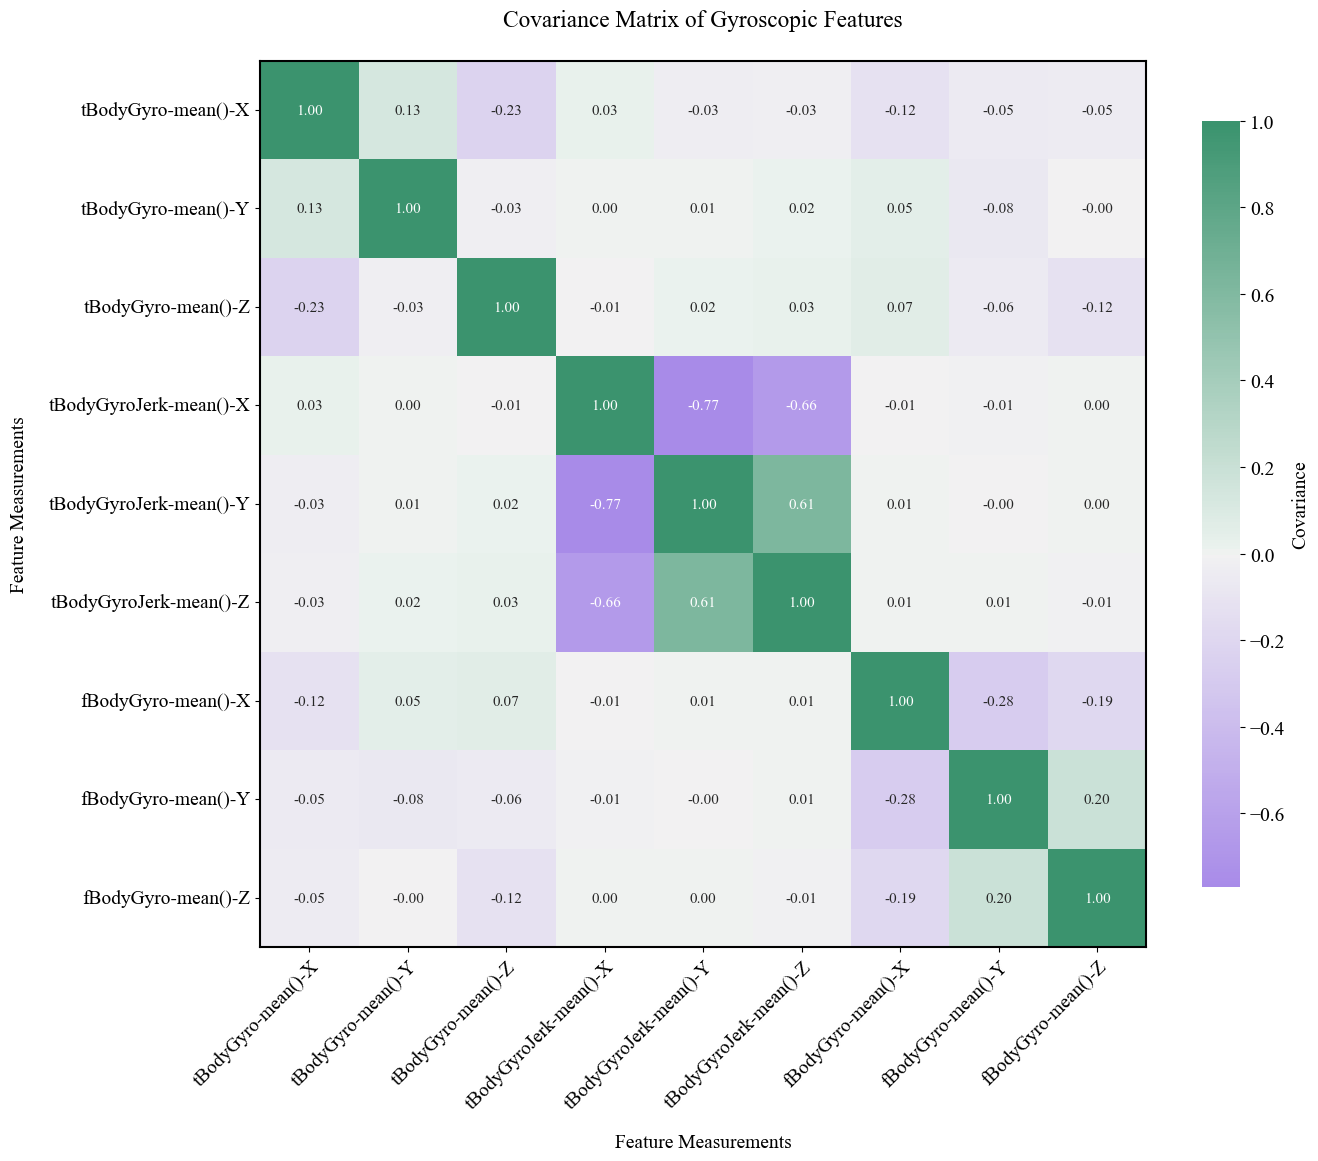

In [20]:
# Create gyroscopic subset DataFrame
gyro_df = full_df[gyro_features].copy()

# Standardize the data
scaler = StandardScaler()
X_gyro_std = scaler.fit_transform(gyro_df)

# Compute covariance matrix
gyro_cov = np.cov(X_standardized, rowvar=False)

# Create the heatmap visualization
plt.figure(figsize=(14, 12))  # Larger size for more features

# Create purple-green diverging colormap (appropriate for gyroscopic data)
gyro_cmap = sns.diverging_palette(275, 150, s=80, l=55, as_cmap=True)

# Plot heatmap with annotation
ax = sns.heatmap(
    gyro_cov,
    annot=True,
    fmt=".2f",
    cmap=gyro_cmap,
    center=0,
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Covariance'},
    annot_kws={'size': 11},  # Slightly smaller for more features
    xticklabels=gyro_features,
    yticklabels=gyro_features
)

# Rotate and adjust labels
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yticks(rotation=0)

# Add titles and labels with padding
plt.title("Covariance Matrix of Gyroscopic Features", pad=25)
plt.xlabel("Feature Measurements", labelpad=15)
plt.ylabel("Feature Measurements", labelpad=15)

# Adjust layout
plt.tight_layout()

# Add border for visual polish
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Save the graph as a PNG
plt.savefig(
    'lab5-JoshuaSummers-covariance_matrix_gyroscopic.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight',   # Remove extra whitespace
    facecolor='white'
)

# Show the visualization
plt.show()

## Calculate the eigenvectors and values

This will calculate the eigenvalues to represent each Principal Component (PC). The eigen vectors will represent the values for each of the Principal components.

In [22]:
# Prepare data
X = full_df[selected_features].copy()
X_std = StandardScaler().fit_transform(X)

# Compute covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Create a DataFrame for eigenvectors
eigenvector_df = pd.DataFrame(
    eigenvectors,
    columns=[f'PC{i+1}' for i in range(len(selected_features))],
    index=selected_features
)

# Seaborn bright palette
colors = sns.color_palette("bright", len(eigenvalues))

### Visualize the eigenvalues per PC
---
*Insights:*
How many correlative features from the 
How many principal components (PCs) are there before there is little new information from additional dimensional reduction? This visualization will display the number; additionally, the larger the individual variance for a particular PC, the stronger the pattern of correlation for that component compared to the rest.

*Observations:*
Most of the correlative patterns exist with the first principal component (PC), but there is little redundancy in the features, as there are only 18 PCs before, and thus little new information to relate; this suggests high uniqueness and independence in the features.

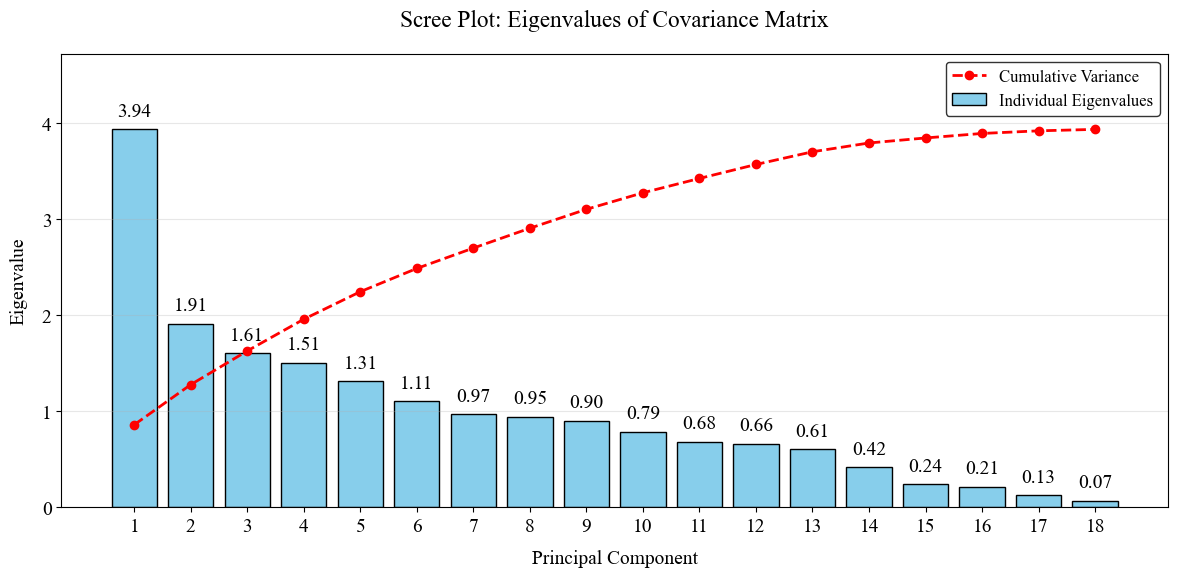

In [24]:
# Setup the figure
plt.figure(figsize=(12, 6))
bars = plt.bar(
    range(1, len(eigenvalues)+1),
    eigenvalues,
    color='skyblue',
    edgecolor='k',
    label='Individual Eigenvalues'
)

# Add cumulative line WITH LABEL
cumulative = np.cumsum(eigenvalues)/np.sum(eigenvalues)
line, = plt.plot(
    range(1, len(eigenvalues)+1),
    cumulative*max(eigenvalues),
    'ro--',
    linewidth=2,
    label='Cumulative Variance'
)
# Pad the max eigenvalue so annotations are not off the graph
max_eigenvalue = max(eigenvalues) * 1.2  # Add 20% padding
plt.ylim(0, max_eigenvalue)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.1,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

# Update the graph details
plt.xlabel('Principal Component', labelpad=10)
plt.ylabel('Eigenvalue', labelpad=10)
plt.title('Scree Plot: Eigenvalues of Covariance Matrix', pad=20)
plt.xticks(range(1, len(eigenvalues)+1))
plt.grid(axis='y', alpha=0.3)
# Add legend
plt.legend(
    loc='upper right',
    frameon=True,
    edgecolor='black',
    prop={'family': 'Times New Roman', 'size': 12},
)
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'lab5-JoshuaSummers-eigenvalues_screeplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

### Visualize the Eigenvector as a Heatmap
---
*Insights:*
How many correlated features from the show up in the same principal component vector? This will show the correlation of accelerometer and gyroscopic features as they relate to each of the PCs.

*Observations:*
Most of the correlative patterns exist with the first 13 principal components, as can be seen by the fairly even distribution of correlation between the different features. The PCs after this have a low correlation.

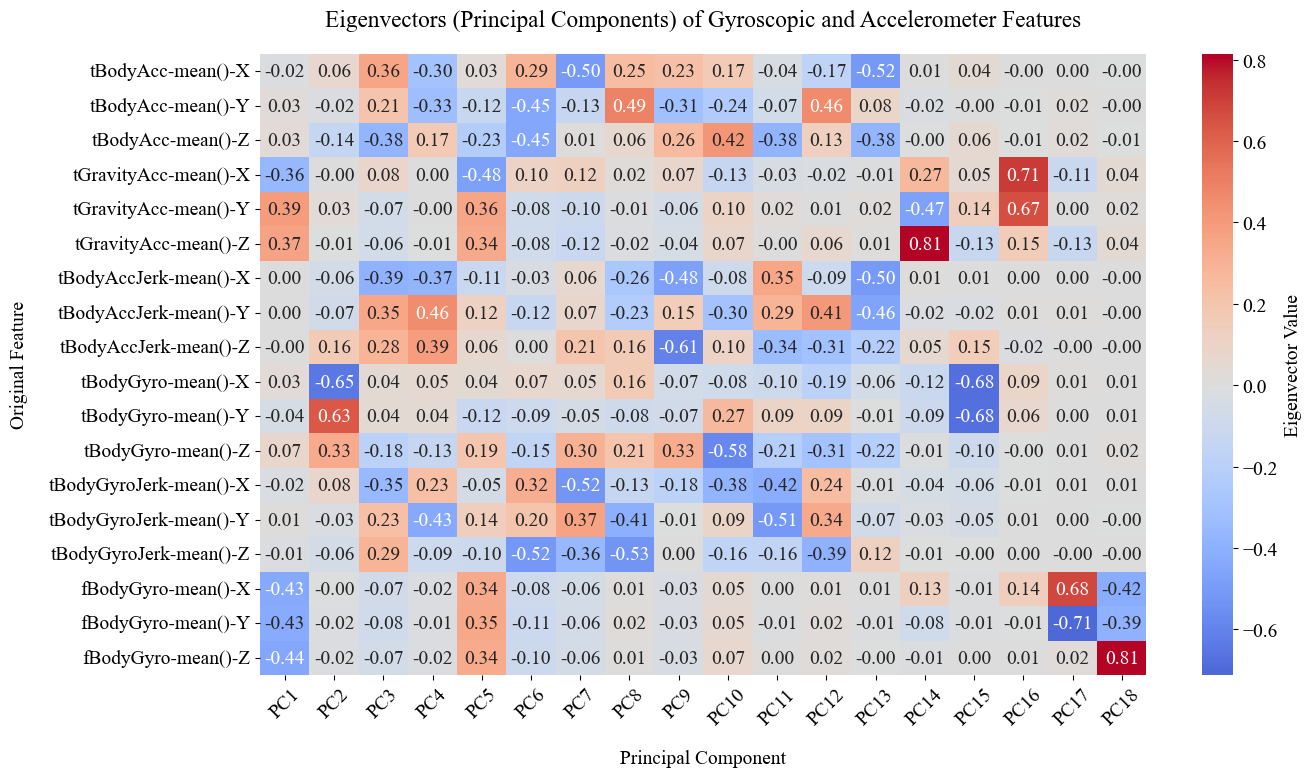

In [26]:
# Setup the figure
plt.figure(figsize=(14, 8))
# Render the heatmap
ax = sns.heatmap(
    eigenvector_df,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Eigenvector Value'}
)

# Customize heatmap appearance
plt.title('Eigenvectors (Principal Components) of Gyroscopic and Accelerometer Features', pad=20)
plt.xlabel('Principal Component', labelpad=15)
plt.ylabel('Original Feature', labelpad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adjust layout and save
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'lab5-JoshuaSummers-eigenvectors_heatmap.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

### Visualize and explain the variance
---
This will map the cumulative explained variance compared to the individual explained variance.

*Insights:*
How many principal components (PCs) are there before there is little new information from additional dimensional reduction? This visualization will display the number; additionally, the larger the individual variance (in this case by percentage) for a particular PC, the stronger the pattern of correlation for that component compared to the rest.

*Observations:*
Most of the correlative patterns exist with the first principal component (PC), but within the first 5, most of the correlation is prominent, after that, another drop occurs at 11, and then the changes are very small after 13.

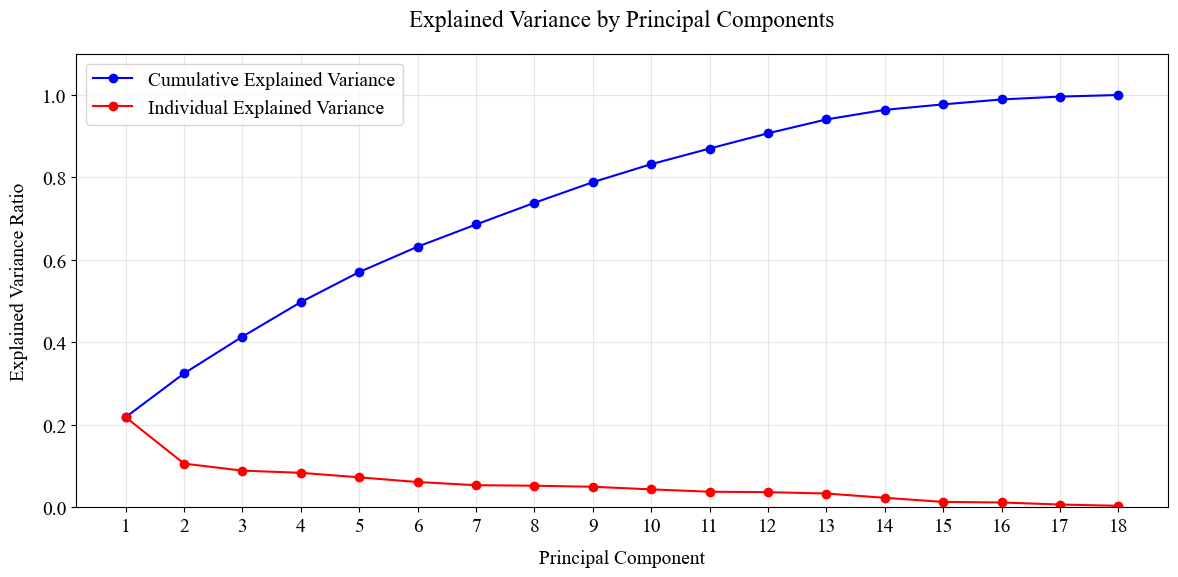

In [28]:
# Calculate the variances
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

# Setup the figure
plt.figure(figsize=(12, 6))
# Plot the lines
plt.plot(
    range(1, len(explained_variance)+1),
    cumulative_variance,
    'bo-',
    label='Cumulative Explained Variance'
)
plt.plot(
    range(1, len(explained_variance)+1),
    explained_variance,
    'ro-',
    label='Individual Explained Variance'
)
# Configure the layout and figure settings
plt.xlabel('Principal Component', labelpad=10)
plt.ylabel('Explained Variance Ratio', labelpad=10)
plt.title('Explained Variance by Principal Components', pad=20)
plt.xticks(range(1, len(explained_variance)+1))
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.ylim(0, 1.1)
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'lab5-JoshuaSummers-explained_variance.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

### Output the eigenvalue and associated variances

In [30]:
print("Eigenvalues and Explained Variance:")
# Create a table from the eigenvalues and generated variances
eigenvalue_table = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(eigenvalues))])
# Output the table details, rounding values to 4
display(eigenvalue_table.round(4))

# Print component information
print("\nExplained variance ratio (first 10 components):")
print(eigenvalue_table['Explained Variance'][:10])  # Use single brackets for a Series

print("\nTotal variance explained by first two components: {:.2f}%".format(
    eigenvalue_table['Cumulative Variance'][:2].sum() * 100))  # Sum of Series

Eigenvalues and Explained Variance:


,Eigenvalue,Explained Variance,Cumulative Variance
PC1,3.9375,0.2187,0.2187
PC2,1.9096,0.1061,0.3248
PC3,1.6059,0.0892,0.4140
PC4,1.5087,0.0838,0.4978
PC5,1.3116,0.0729,0.5707
PC6,1.1070,0.0615,0.6322
PC7,0.9694,0.0538,0.6860
PC8,0.9458,0.0525,0.7386
PC9,0.9005,0.0500,0.7886
PC10,0.7867,0.0437,0.8323



Explained variance ratio (first 10 components):
PC1     0.218731
PC2     0.106081
PC3     0.089208
PC4     0.083806
PC5     0.072858
PC6     0.061493
PC7     0.053848
PC8     0.052540
PC9     0.050022
PC10    0.043700
Name: Explained Variance, dtype: float64

Total variance explained by first two components: 54.35%


## 2D Visualziations (Scatter Plot PCA)

These visualizations will represent the first 2 PCs in a two-dimensional graph, to compare the correlation between those 2 PCs as they relate to behavioral tests.

### Normalized 2D PCA
---
*Insights:*
How closely do the PCs cluster their values, and what kind of distribution do we have between the raw data and the normalized data when it comes to representing the categorization of each PC as it relates to Behavior type?

*Observations:*
The data is clustered closely together, and the values are small, making some deltas hard to see.

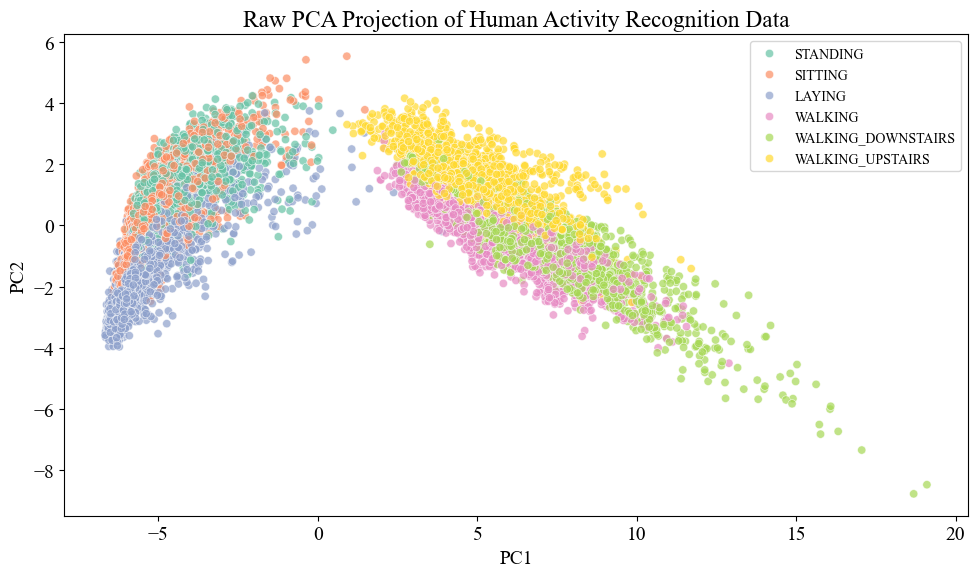

In [33]:
# Drop non-numeric columns
X = full_df.drop(columns=['Subject', 'Activity', 'ActivityName'])

# Drop duplicate ActivityName columns generated by Seaborn (if they exist)
if 'ActivityName_x' in X.columns or 'ActivityName_y' in X.columns:
    X = X.drop(columns=['ActivityName_x', 'ActivityName_y'])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create DataFrame with PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['ActivityName'] = full_df['ActivityName']  # Add activity label back for plotting

# Graph the reduced DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='ActivityName', alpha=0.7, palette='Set2')
plt.title('Raw PCA Projection of Human Activity Recognition Data')
# Update the legend
plt.legend(prop={'family': 'Times New Roman', 'size': 10})

# Save the graph as a PNG
plt.savefig(
    'lab5-JoshuaSummers-pca_activities_scattplot_2d_raw.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the visualization
plt.show()

### Normalized 2D PCA
---
*Insights:*
How closely do the PCs cluster their values, and what kind of distribution do we have between the raw data and the normalized data when it comes to representing the categorization of each PC as it relates to Behavior type?

*Observations:*
The data is still clustered, but the normalization created more distance between values, and makes the outliers more clear.

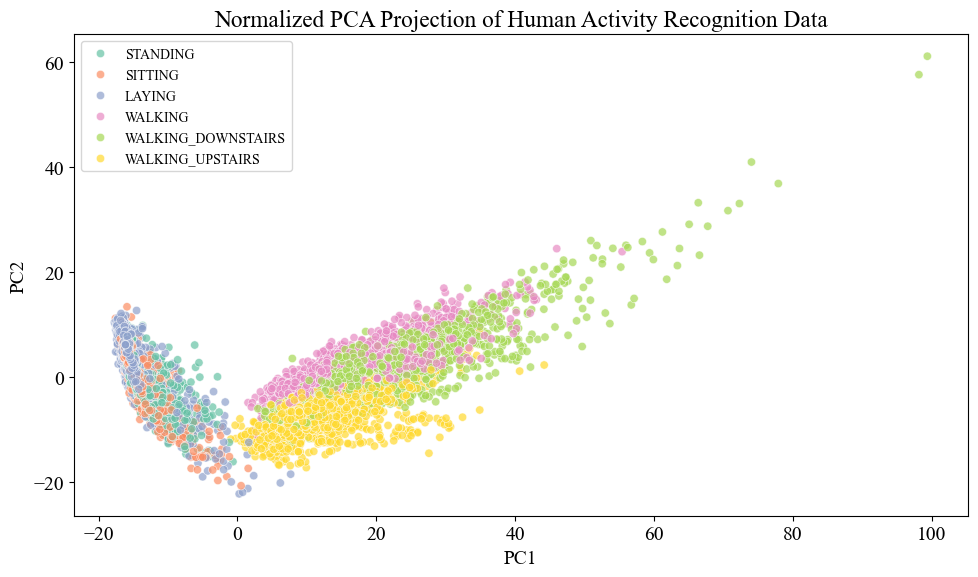

In [35]:
# Drop non-numeric columns
X = full_df.drop(columns=['Subject', 'Activity', 'ActivityName'])

# Drop duplicate ActivityName columns generated by Seaborn (if they exist)
if 'ActivityName_x' in X.columns or 'ActivityName_y' in X.columns:
    X = X.drop(columns=['ActivityName_x', 'ActivityName_y'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create DataFrame with PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['ActivityName'] = full_df['ActivityName']  # Add activity label back for plotting

# Graph the reduced DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='ActivityName', alpha=0.7, palette='Set2')
plt.title('Normalized PCA Projection of Human Activity Recognition Data')
# Update the legend
plt.legend(prop={'family': 'Times New Roman', 'size': 10})

# Save the graph as a PNG
plt.savefig(
    'lab5-JoshuaSummers-pca_activities_scattplot_2d_normalized.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the visualization
plt.show()

## Parallel Coordinate Visualizations

These graphs will show the density of one type of behavior as it correlates with the PCs that have useful information about correlation (the first 13).

*Insights:*
If most blue (Activity) and yellow (Activity) lines cluster in distinct paths, it suggests that PCA effectively separates the Activity types, providing insight into the Activity structure from all dimensions!

*Observations:*
Most of the walking behaviors show similar correlations between the PCs, but have relative variation, whereas the laying, standing, and sitting behaviors have less variation and are more closely correlated. Also, we can see that the walking behaviors have a larger correlation at PC1, and thus PC1 more closely reflects the walking behaviors; conversely, standing, sitting, and laying are larger at PC2, so we can say that this PC is more closely associated with postural changes.

/var/folders/b0/gfhb3q152fj7dx14t68p8cch0000gn/T/ipykernel_22783/1700203416.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



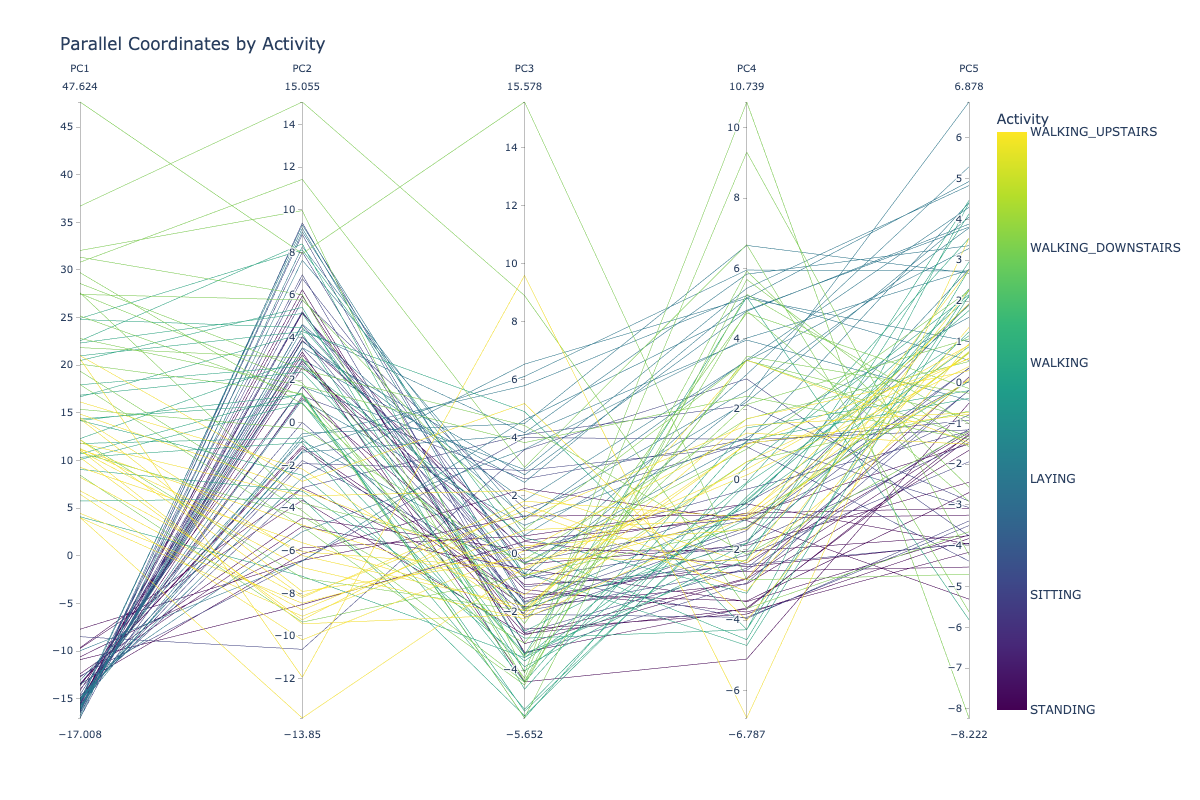

In [37]:
# Perform PCA (first 5 components)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(5)])
pca_df['ActivityName'] = full_df['ActivityName']

# Create numerical mapping for activities
activities = pca_df['ActivityName'].unique()
activity_ids = {name: i for i, name in enumerate(activities)}
pca_df['Activity_ID'] = pca_df['ActivityName'].map(activity_ids)

# Sample data (optional)
sample_df = pca_df.groupby('ActivityName').apply(lambda x: x.sample(20)).reset_index(drop=True)

# Create the plot using numerical IDs for coloring
fig = px.parallel_coordinates(
    sample_df,
    color='Activity_ID',
    dimensions=[f'PC{i+1}' for i in range(5)] + ['ActivityName'],
    color_continuous_scale='Viridis',
    title='Parallel Coordinates by Activity'
)

# Customize the colorbar to show activity names
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Activity',
        tickvals=np.linspace(0, len(activities)-1, len(activities)),
        ticktext=activities
    ),
    height=800,
    width=1200,
    plot_bgcolor='white',
    paper_bgcolor='white'
)
# Save the graph as a PNG using plotly's write_image
fig.write_image(
    'lab5-JoshuaSummers-pca_activities_parallel_coordinates.png',
    scale=3,               # High resolution (equivalent to dpi)
    engine='kaleido'        # Recommended rendering engine
)
# Show the visualization
fig.show()

## Biplot Visualization
---
This will show the vector intensities within the 2D space, and is focused on a small subset of the features, since presenting all in a biplot would be ugly.

*Insights:*
Each listed vector line shows a feature and how it correlates to one of the first two PCs that are correlated. The length of the line indicates the intensity of the correlation, while the direction points towards the PC and shows whether the value is increasing or decreasing.

*Observations:*
Between these accelerometer and gyroscope features, two groups of features correlate in a similar direction, but with varying intensities; moreover, there is another group that points away from these two PCs entirely.

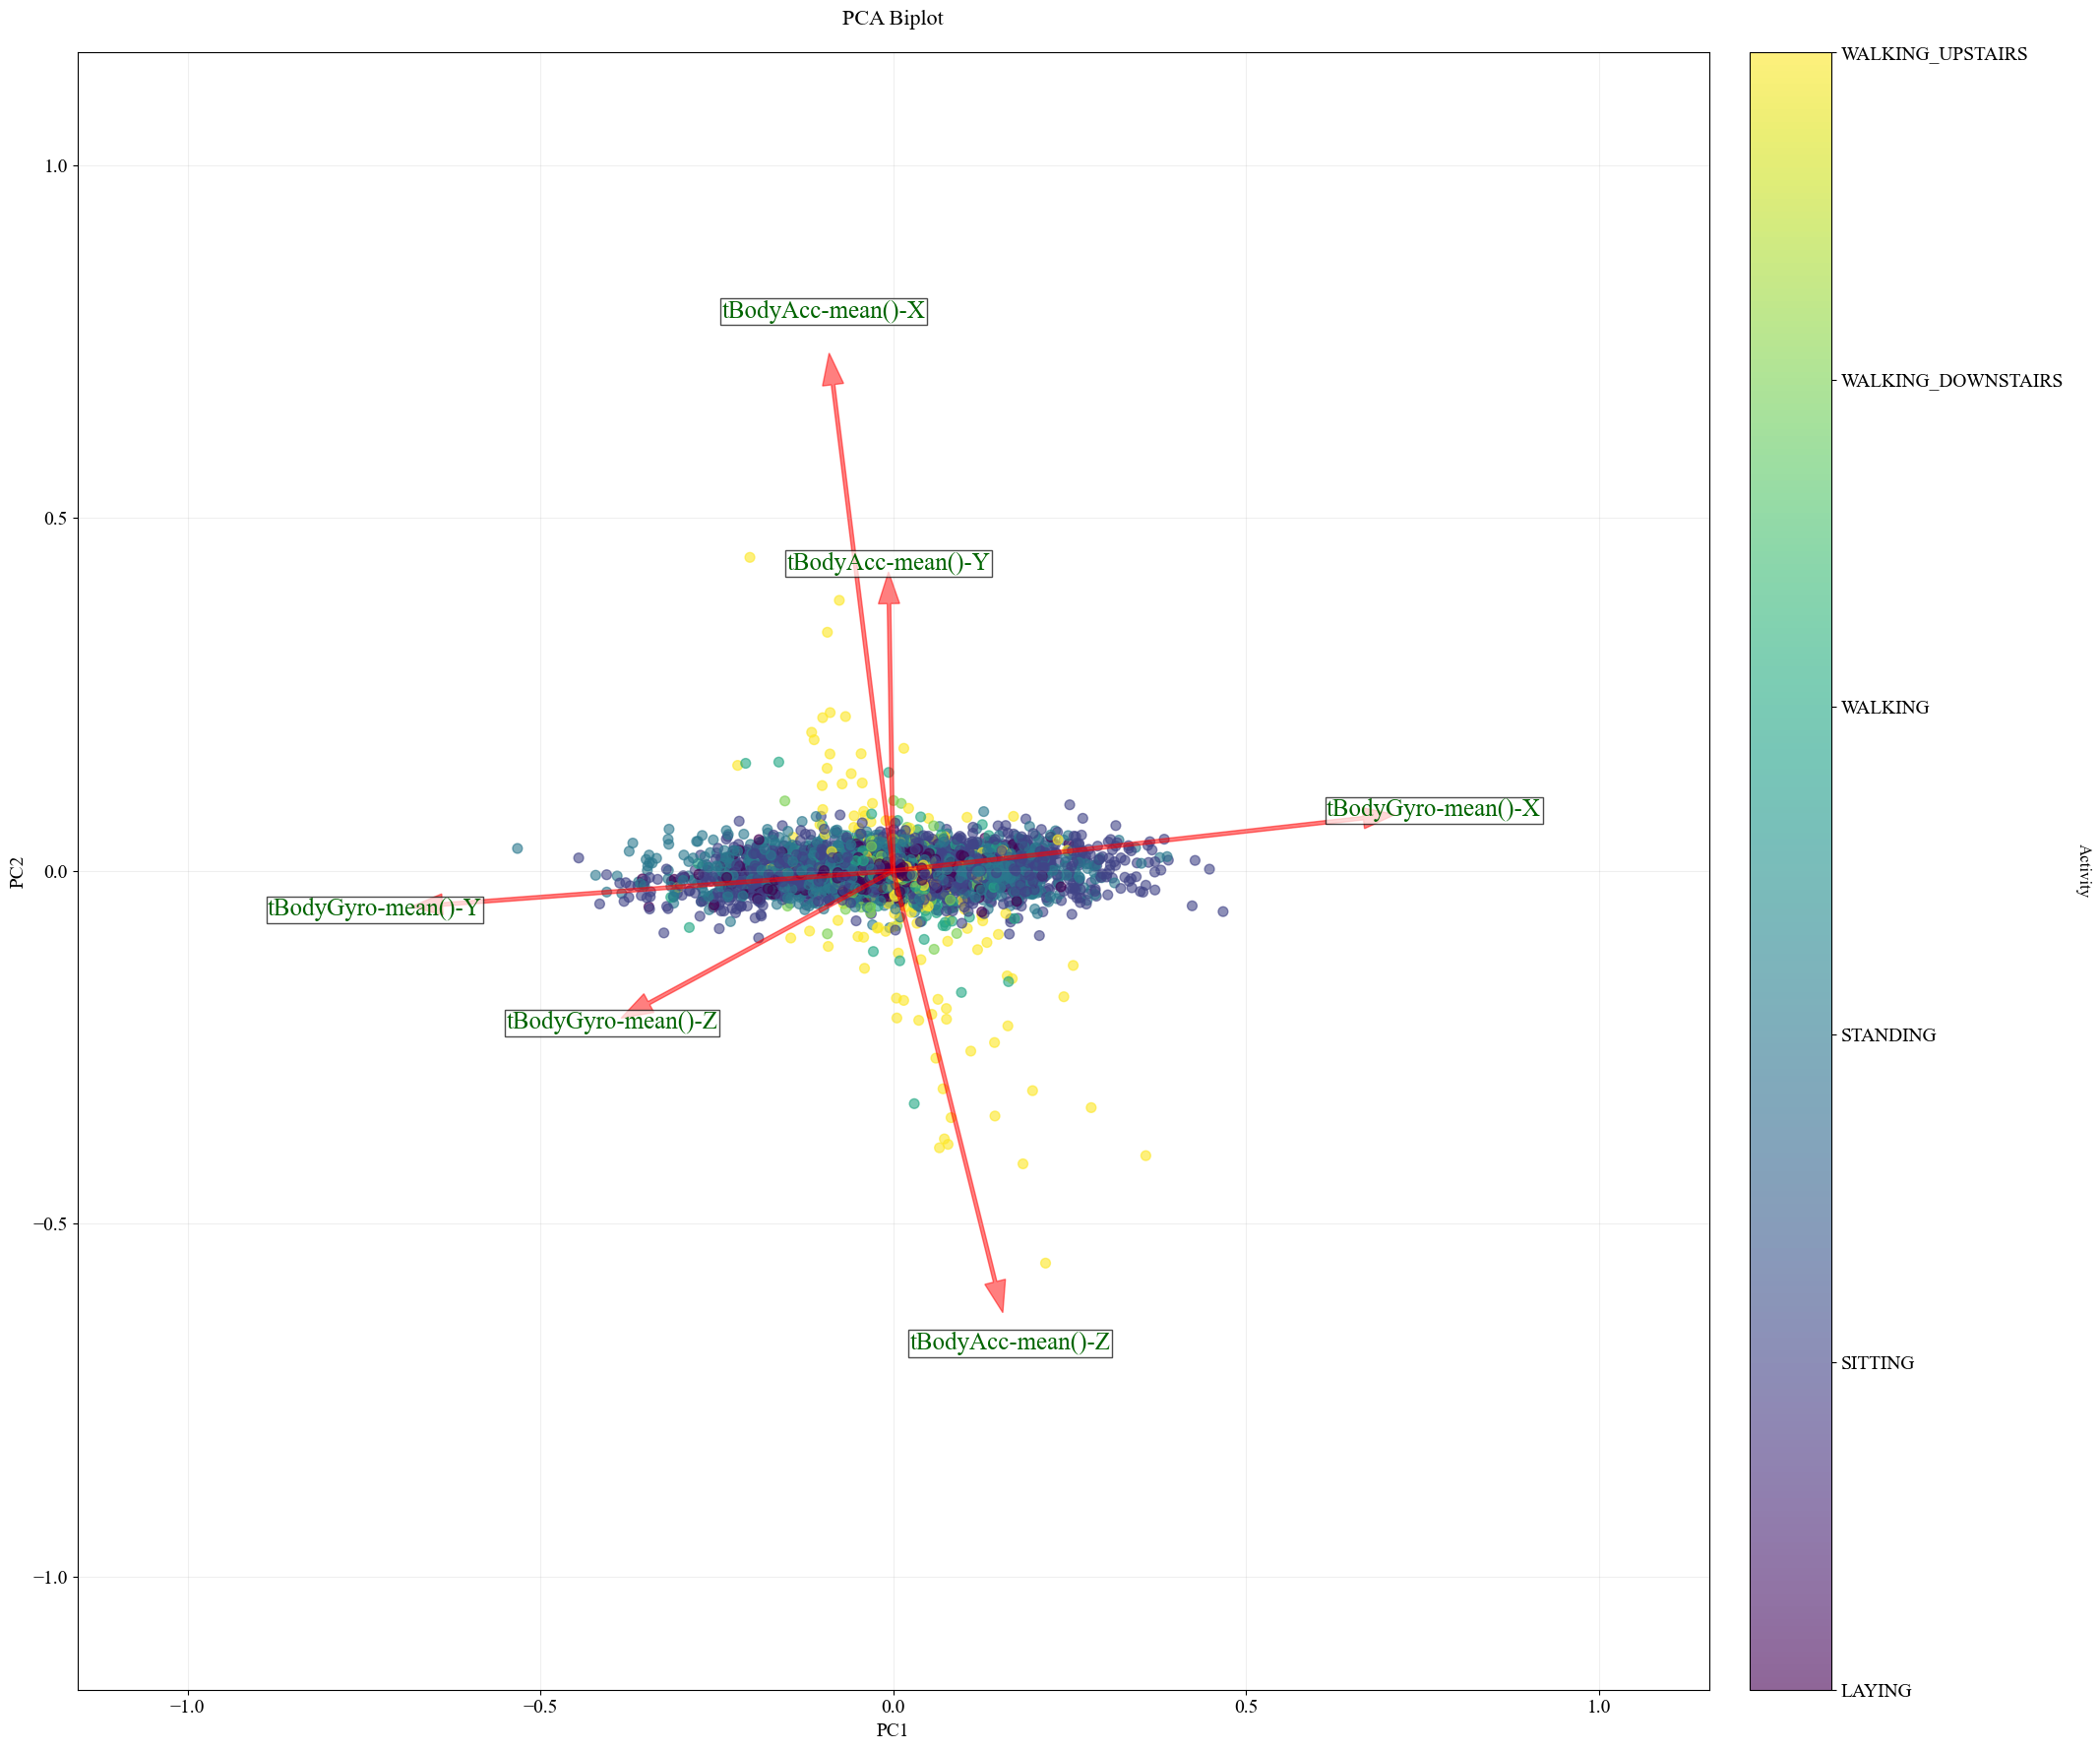

In [39]:
# Biplot function
def biplot(score, coeff, labels=None, figsize=(20, 20), fontsize=10, dpi=100):
    plt.figure(figsize=figsize, dpi=dpi)
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    
    # Scale the scores to match coefficient scale
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xs_scaled = xs * scalex
    ys_scaled = ys * scaley
    
    # Plot scores with better visibility
    scatter = plt.scatter(xs_scaled, ys_scaled, 
                         c=full_df['Activity'].astype('category').cat.codes,
                         cmap='viridis', alpha=0.6, s=50)
    
    
    # Plot arrows and labels
    arrow_length_multiplier = 1.5  # Increased from 1.15 for better spacing
    # Adjust these parameters for fewer columns
    base_distance = 1.15  # Reduced from 1.25
    min_spacing = 0.1     # Reduced from 0.15

    # Plot arrows and labels
    for i in range(n):
        # Draw an arrow
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], 
                 color='r', alpha=0.5, width=0.005, head_width=0.03)
        
        # Calculate initial text position (closer than before)
        text_x = coeff[i,0] * base_distance
        text_y = coeff[i,1] * base_distance
        
        # Add the text label
        if labels is None:
            plt.text(text_x, text_y, f"Var{i+1}", 
                    color='darkgreen', ha='center', va='center',
                    fontsize=fontsize, 
                    bbox=dict(facecolor='white', alpha=0.7, pad=1))
        else:
            plt.text(text_x, text_y, labels[i], 
                    color='darkgreen', ha='center', va='center',
                    fontsize=fontsize, 
                    bbox=dict(facecolor='white', alpha=0.7, pad=1))
    
    # Axis labels and title
    plt.xlabel("PC1", fontsize=14)
    plt.ylabel("PC2", fontsize=14)
    plt.grid(alpha=0.2)
    plt.title('PCA Biplot', fontsize=16, pad=20)

    # Get activity labels from the dataframe
    activity_series = full_df['ActivityName'].astype('category')
    activity_names = activity_series.cat.categories
    activity_codes = activity_series.cat.codes
    
    # Colorbar for activities
    cbar = plt.colorbar(scatter, pad=0.02)
    cbar.set_label('Activity', rotation=270, labelpad=20, fontsize=12)
    cbar.set_ticks(np.arange(len(activity_names)))
    cbar.set_ticklabels(activity_names)
    
    # Set equal aspect ratio and adjust limits
    plt.gca().set_aspect('equal', adjustable='box')
    x_margin = 0.2 * (np.max(np.abs(plt.xlim())))
    y_margin = 0.2 * (np.max(np.abs(plt.ylim())))
    plt.xlim(-1 - x_margin, 1 + x_margin)
    plt.ylim(-1 - y_margin, 1 + y_margin)
    # Update the layout
    plt.tight_layout()
    # Save the visualization to PNG
    plt.savefig(
        'lab5-JoshuaSummers-pca_activities_biplot.png',
        dpi=300,
        bbox_inches='tight',
        facecolor='white',
    )

# Select interesting features for biplot
limited_df = full_df[[
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
]].copy()
top_features = min(20, len(limited_df.columns))  # Ensure we don't exceed available features
feature_names = limited_df.columns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(limited_df)

# Create the PCA object
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get the coefficients for the top features
coeff = np.transpose(pca.components_[:2, :])
most_important = [np.abs(coeff[:,i]).argsort()[::-1][:top_features] for i in range(2)]
most_important = np.unique(np.concatenate(most_important))

# Generate the biplot
biplot(pca.transform(X_scaled)[:, :2], 
       coeff[most_important, :2], 
       labels=feature_names[most_important],
       figsize=(22, 18),  # Very large figure size
       fontsize=18)       # Larger font size

## 3D PCA visualization
---
This will show which activities are the most intense, but when considering three PCs instead of just two.

*Insights:*
This will show how the activities cluster from a three-dimensional perspective: when evaluating correlation within the first three PCs (instead of the two that are used in 2D visualizations).

*Observations:*
We can see that most of the walking upstairs dominates the perspective we can see, and seems evenly split between PC1 and PC3 (since PC2 seems to be the primary PC it has a correlation with).

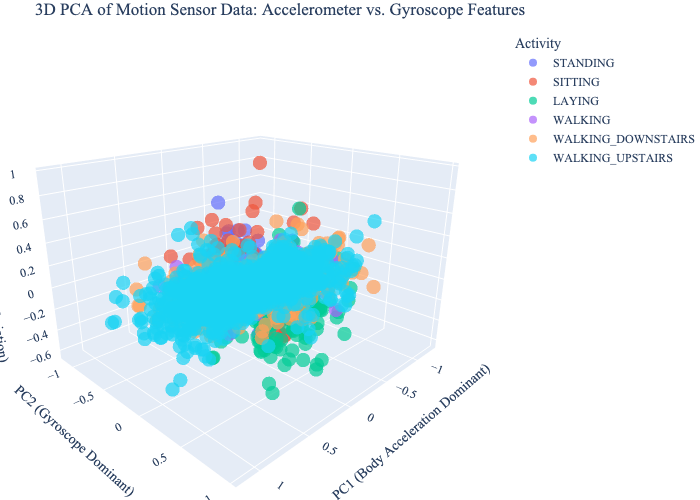

In [41]:
# Select features for PCA
limited_df = full_df[[
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
]].copy()

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(limited_df)

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Activity'] = full_df['ActivityName']  # Add activity labels

# Create 3D scatter plot with PROPER LABELS
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Activity',
    title='3D PCA of Motion Sensor Data: Accelerometer vs. Gyroscope Features',
    labels={
        'PC1': 'PC1 (Body Acceleration Dominant)',
        'PC2': 'PC2 (Gyroscope Dominant)',
        'PC3': 'PC3 (Cross-Axis Variation)'
    },
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Plotly  # Colorblind-friendly
)

# Enhance layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC1 (Body Acceleration Dominant)',
        yaxis_title='PC2 (Gyroscope Dominant)',
        zaxis_title='PC3 (Cross-Axis Variation)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))  # Adjust default view
    ),
    font=dict(family="Times New Roman", size=12),
    margin=dict(l=0, r=0, b=0, t=30)  # Tight margins
)

# Save high-resolution image
fig.write_image(
    'lab5-JoshuaSummers-3d_pca_plot.png',
    scale=3,  # 300dpi equivalent
    width=1200,
    height=800
)
# Show the visualization
fig.show()